In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import uniform, norm, expon


The Operations Analyst for Piedmont Commuter Airlines (PCA) is looking at optimizing the number of reservations that the airline accepts for a popular regional flight.  The flight operates with a small turbo-prop aircraft with 19 passenger seats available.  PCA sells non-refundable tickets for this flight for \\$150 per seat.  Knowing that some passengers will purchase tickets and then not show for the flight, airlines tend to overbook their flights to increase their revenue.  If the flight is overbooked and more than 19 passengers show up, some of them have to be bumped to a later flight.  PCA gives bumped passengers vouchers for a free meal, a free flight at a later date and, if necessary, pays for an overnight stay at an airport hotel.  The average cost of this package is \\$325 per bumped passenger.

In [2]:
## Deterministic Model

## choice variable
reservations_accepted = 25

## given varaiables
seats_available = 19
ticket_revenue_per_seat = 150
cost_bumping = 325

## variables to replace with RNG
seats_demanded = 23
no_show_passengers = 4

## calculated values
tickets_sold = min(seats_demanded, reservations_accepted)
passengers_to_board = tickets_sold - no_show_passengers

ticket_revenue = tickets_sold * ticket_revenue_per_seat
total_cost_bumping = max(0, cost_bumping * (passengers_to_board - seats_available))

marginal_profit = ticket_revenue - total_cost_bumping

marginal_profit

3450

In [3]:
## Discrete distribution for seats demanded

def seats_demanded_gen(num):
    values = np.arange(14, 26)
    probs = [.03, .05, .07, .09, .11, .15, .18, .14, .08, .05, .03, .02]

    # Draw a weighted sample
    results = np.random.choice(values, num, p = probs).tolist()
    return results




In [4]:
seats_demanded_trials = seats_demanded_gen(10000)

unique, counts = np.unique(seats_demanded_trials, return_counts=True)
pd.DataFrame([unique, counts, counts/sum(counts)], index = ['seats demanded', 'frequency', 'percent'])

,0,1,2,3,4,5,6,7,8,9,10,11
seats demanded,14.0000,15.0000,16.000,17.0000,18.0000,19.0000,20.0000,21.0000,22.000,23.0000,24.0000,25.0000
frequency,293.0000,492.0000,680.000,917.0000,1121.0000,1454.0000,1876.0000,1406.0000,780.000,499.0000,287.0000,195.0000
percent,0.0293,0.0492,0.068,0.0917,0.1121,0.1454,0.1876,0.1406,0.078,0.0499,0.0287,0.0195


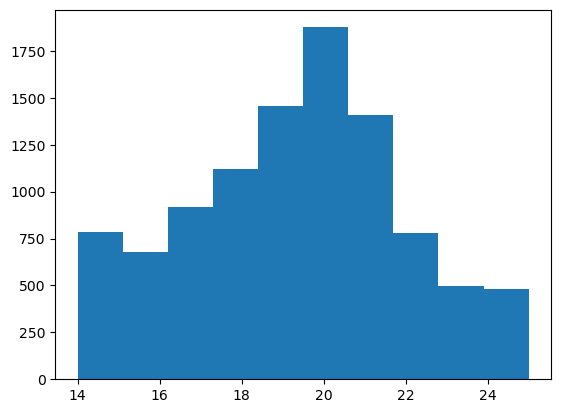

In [5]:
plt.hist(seats_demanded_trials)
plt.show()

In [6]:
## Binomial distribution for no show

def no_show_gen(num, tickets_sold):
    
    prob_no_show = .1
    results = []
    
    for i in np.arange(1, num + 1) :
        no_shows = np.random.binomial(tickets_sold, prob_no_show)
        results.append(no_shows)
    
    return results

In [7]:
no_shows_trials = no_show_gen(10,20)

unique, counts = np.unique(no_shows_trials, return_counts=True)
pd.DataFrame([unique, counts, counts/sum(counts)], index = ['seats demanded', 'frequency', 'percent'])

,0,1,2,3
seats demanded,0.0,1.0,2.0,3.0
frequency,2.0,4.0,2.0,2.0
percent,0.2,0.4,0.2,0.2


In [8]:
## Simulation Model

reservations_accepted = 25

seats_available = 19
ticket_revenue_per_seat = 150
cost_bumping = 325

seats_demanded = seats_demanded_gen(1)[0]

tickets_sold = min(seats_demanded, reservations_accepted)

no_show_passengers = no_show_gen(1,tickets_sold)[0]

passengers_to_board = tickets_sold - no_show_passengers

ticket_revenue = tickets_sold * ticket_revenue_per_seat
total_cost_bumping = max(0, cost_bumping * (passengers_to_board - seats_available))

marginal_profit = ticket_revenue - total_cost_bumping

marginal_profit

2800

In [9]:
## Simulation Trials

reservations_accepted = 25

seats_available = 19
ticket_revenue_per_seat = 150
cost_bumping = 325


num_trials = 10000
Sim = pd.DataFrame(columns = ['seats_demanded', 'no_shows', 'ticket_revenue', 'cost_bumping', 'marginal_profit'])

for t in np.arange(1, num_trials + 1) :
    seats_demanded = seats_demanded_gen(1)[0]
    tickets_sold = min(seats_demanded, reservations_accepted)
    no_show_passengers = no_show_gen(1,tickets_sold)[0]
    passengers_to_board = tickets_sold - no_show_passengers
    ticket_revenue = tickets_sold * ticket_revenue_per_seat
    total_cost_bumping = max(0, cost_bumping * (passengers_to_board - seats_available))
    marginal_profit = ticket_revenue - total_cost_bumping
    Sim.loc[t] = [seats_demanded, no_show_passengers, ticket_revenue, total_cost_bumping, marginal_profit]

In [10]:
Sim

,seats_demanded,no_shows,ticket_revenue,cost_bumping,marginal_profit
1,18,1,2700,0,2700
2,18,2,2700,0,2700
3,19,0,2850,0,2850
4,16,0,2400,0,2400
5,20,3,3000,0,3000
...,...,...,...,...,...
9996,19,3,2850,0,2850
9997,22,2,3300,325,2975
9998,21,1,3150,325,2825
9999,18,2,2700,0,2700


In [11]:
Sim['marginal_profit'].mean()

2762.53

In [12]:
## Reservations What If

reservations_accepted = np.arange(15, 33, 2)

seats_available = 19
ticket_revenue_per_seat = 150
cost_bumping = 325


num_trials = 10000
SimOutput = pd.DataFrame(columns = ['average_MP'], index = reservations_accepted)

for r in reservations_accepted :
    marginal_profit_results = []
    for t in np.arange(1, num_trials + 1) :
        
        seats_demanded = seats_demanded_gen(1)[0]
        tickets_sold = min(seats_demanded, r)
        no_show_passengers = no_show_gen(1,tickets_sold)[0]
        passengers_to_board = tickets_sold - no_show_passengers
        ticket_revenue = tickets_sold * ticket_revenue_per_seat
        total_cost_bumping = max(0, cost_bumping * (passengers_to_board - seats_available))
        marginal_profit = ticket_revenue - total_cost_bumping
        marginal_profit_results.append(marginal_profit)
    
    SimOutput.loc[r, 'average_MP'] = np.mean(marginal_profit_results)
    

In [13]:
SimOutput

,average_MP
15,2245.44
17,2512.845
19,2724.405
21,2791.205
23,2775.54
25,2763.38
27,2761.31
29,2769.04
31,2763.5925


In [14]:
import numpy as np
from scipy.optimize import minimize_scalar

# Constants
num_seats = 19
ticket_price = 150
bump_cost = 325

# Function to calculate expected revenue
def expected_revenue(num_reservations):
    # Probability of each number of passengers showing up
    prob_passengers = np.zeros(num_seats + 1)
    for i in range(num_seats + 1):
        prob_passengers[i] = np.exp(-num_reservations) * (num_reservations**i) / np.math.factorial(i)
    prob_passengers[num_seats] += 1 - np.sum(prob_passengers)

    # Expected revenue
    revenue = num_reservations * ticket_price
    bumped_passengers = max(0, np.sum(prob_passengers) - num_seats)
    revenue -= bumped_passengers * bump_cost
    return revenue

# Optimize the number of reservations
optimal_reservations = minimize_scalar(lambda x: -expected_revenue(x), bounds=(0, 100), method='bounded').x

print("Optimal number of reservations:", round(optimal_reservations))
print("Expected revenue with optimal reservations:", round(expected_revenue(optimal_reservations)))


Optimal number of reservations: 100
Expected revenue with optimal reservations: 15000


In [15]:
import numpy as np

# Parameters
flight_capacity = 19
ticket_price = 150
compensation_cost = 325
num_simulations = 10000
show_up_rate = 0.9  # Assume 90% of passengers show up
max_overbooking = 10  # Max extra tickets to sell

# Function to simulate one flight
def simulate_flight(overbooked_tickets):
    # Total seats sold
    total_seats_sold = flight_capacity + overbooked_tickets
    # Randomly determine if each passenger shows up
    show_ups = np.random.rand(total_seats_sold) < show_up_rate
    # Count how many passengers showed up
    passengers_showed_up = np.sum(show_ups)
    # Calculate bumped passengers
    bumped_passengers = max(0, passengers_showed_up - flight_capacity)
    # Calculate profit
    profit = (total_seats_sold * ticket_price) - (bumped_passengers * compensation_cost)
    return profit

# Simulate multiple flights for different levels of overbooking and calculate average profit
average_profits = []
for overbooked_tickets in range(max_overbooking + 1):
    profits = [simulate_flight(overbooked_tickets) for _ in range(num_simulations)]
    average_profits.append(np.mean(profits))

# Identify the optimal number of extra tickets to sell
optimal_overbooking = np.argmax(average_profits)
optimal_profit = average_profits[optimal_overbooking]

print(f"Optimal overbooking level: {optimal_overbooking} extra tickets")
print(f"Expected profit at this level: ${optimal_profit:.2f}")


Optimal overbooking level: 2 extra tickets
Expected profit at this level: $2996.89
